In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download historical price data from Yahoo Finance
ticker = "QQQ"  # Apple stock symbol
start_date = "2010-01-01"
end_date = "2024-10-16"
data = yf.download(ticker, start=start_date, end=end_date)

# Select closing prices
prices = data['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Split the data into training and testing sets
train_size = int(len(prices_scaled) * 0.7)
train_data, test_data= prices_scaled[:train_size], prices_scaled[train_size:]
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(100, train_data.shape[0]):
    X_train.append(train_data[i-100: i])
    y_train.append(train_data[i, 0])
for i in range(100, test_data.shape[0]):
    X_test.append(test_data[i-100: i])
    y_test.append(test_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
train_data.shape

(2604, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0087
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 7.9077e-05
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 6.4634e-05
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 6.1582e-05
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 5.3549e-05
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 4.5875e-05
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 5.8644e-05
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 4.7586e-05
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.8649e-05
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 4.2819e-05
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 3.8410e-05
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 4.2402e-05
Epoch 13/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 4.2479e-05
Epoch 14/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 3.5311e-05
Epoch

In [ ]:
# Predict closing prices
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Denormalize the predictions
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
train_predictions = scaler.inverse_transform(train_predictions)
y_train_unscaled = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_unscaled = scaler.inverse_transform(y_test)

# Visualize the results

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


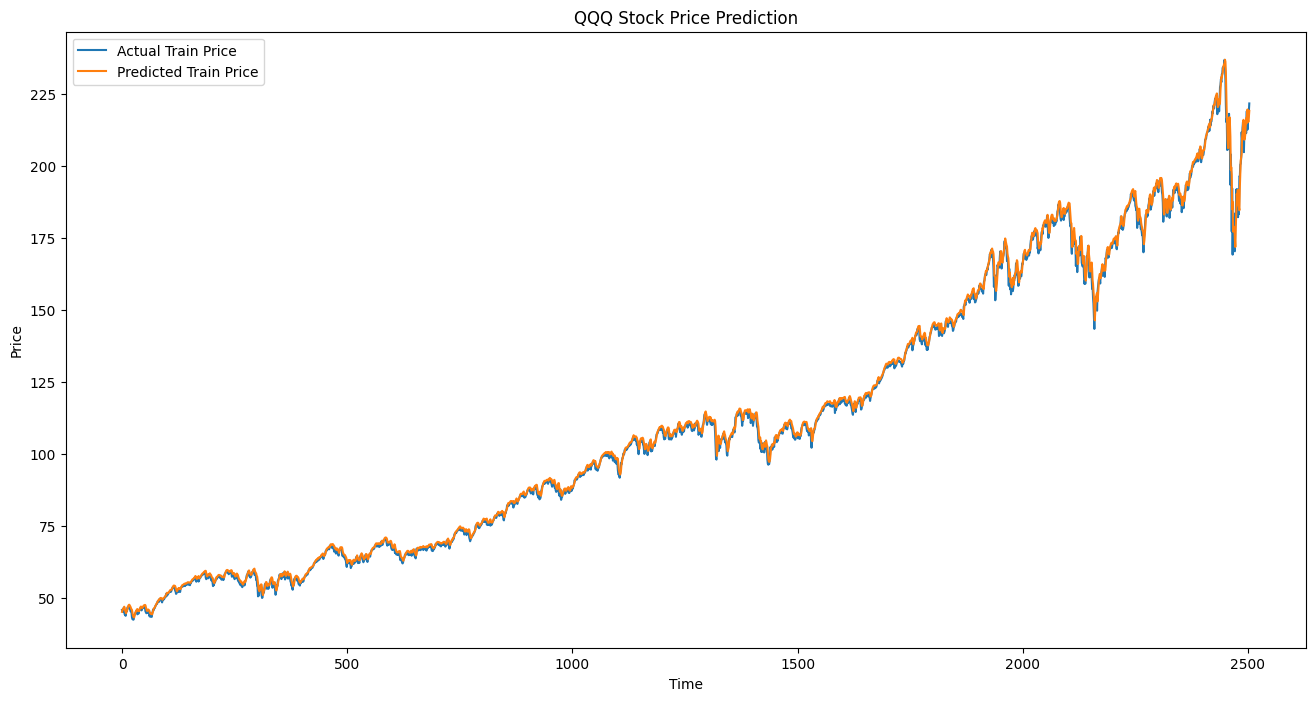

In [ ]:
# prompt: Visualize the results

plt.figure(figsize=(16, 8))
plt.plot(y_train_unscaled, label='Actual Train Price')
plt.plot(train_predictions, label='Predicted Train Price')
#plt.plot([len(y_train_unscaled)] + list(range(len(y_train_unscaled), len(y_train_unscaled) + len(y_test_unscaled))),
         #list(y_test_unscaled) , label='Actual Test Price')
#plt.plot([len(y_train_unscaled)] + list(range(len(y_train_unscaled), len(y_train_unscaled) + len(y_test_unscaled))),
         #list(test_predictions), label='Predicted Test Price')
plt.title('QQQ Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()